In [70]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from subprocess import check_output
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
from time import time
from time import sleep
import os
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from scipy import ndimage
from sklearn.metrics import explained_variance_score


['boneage-test-dataset', 'boneage-test-dataset.csv', 'boneage-training-dataset', 'boneage-training-dataset.csv']
Working with 12611 images
Image examples: 
10045.png


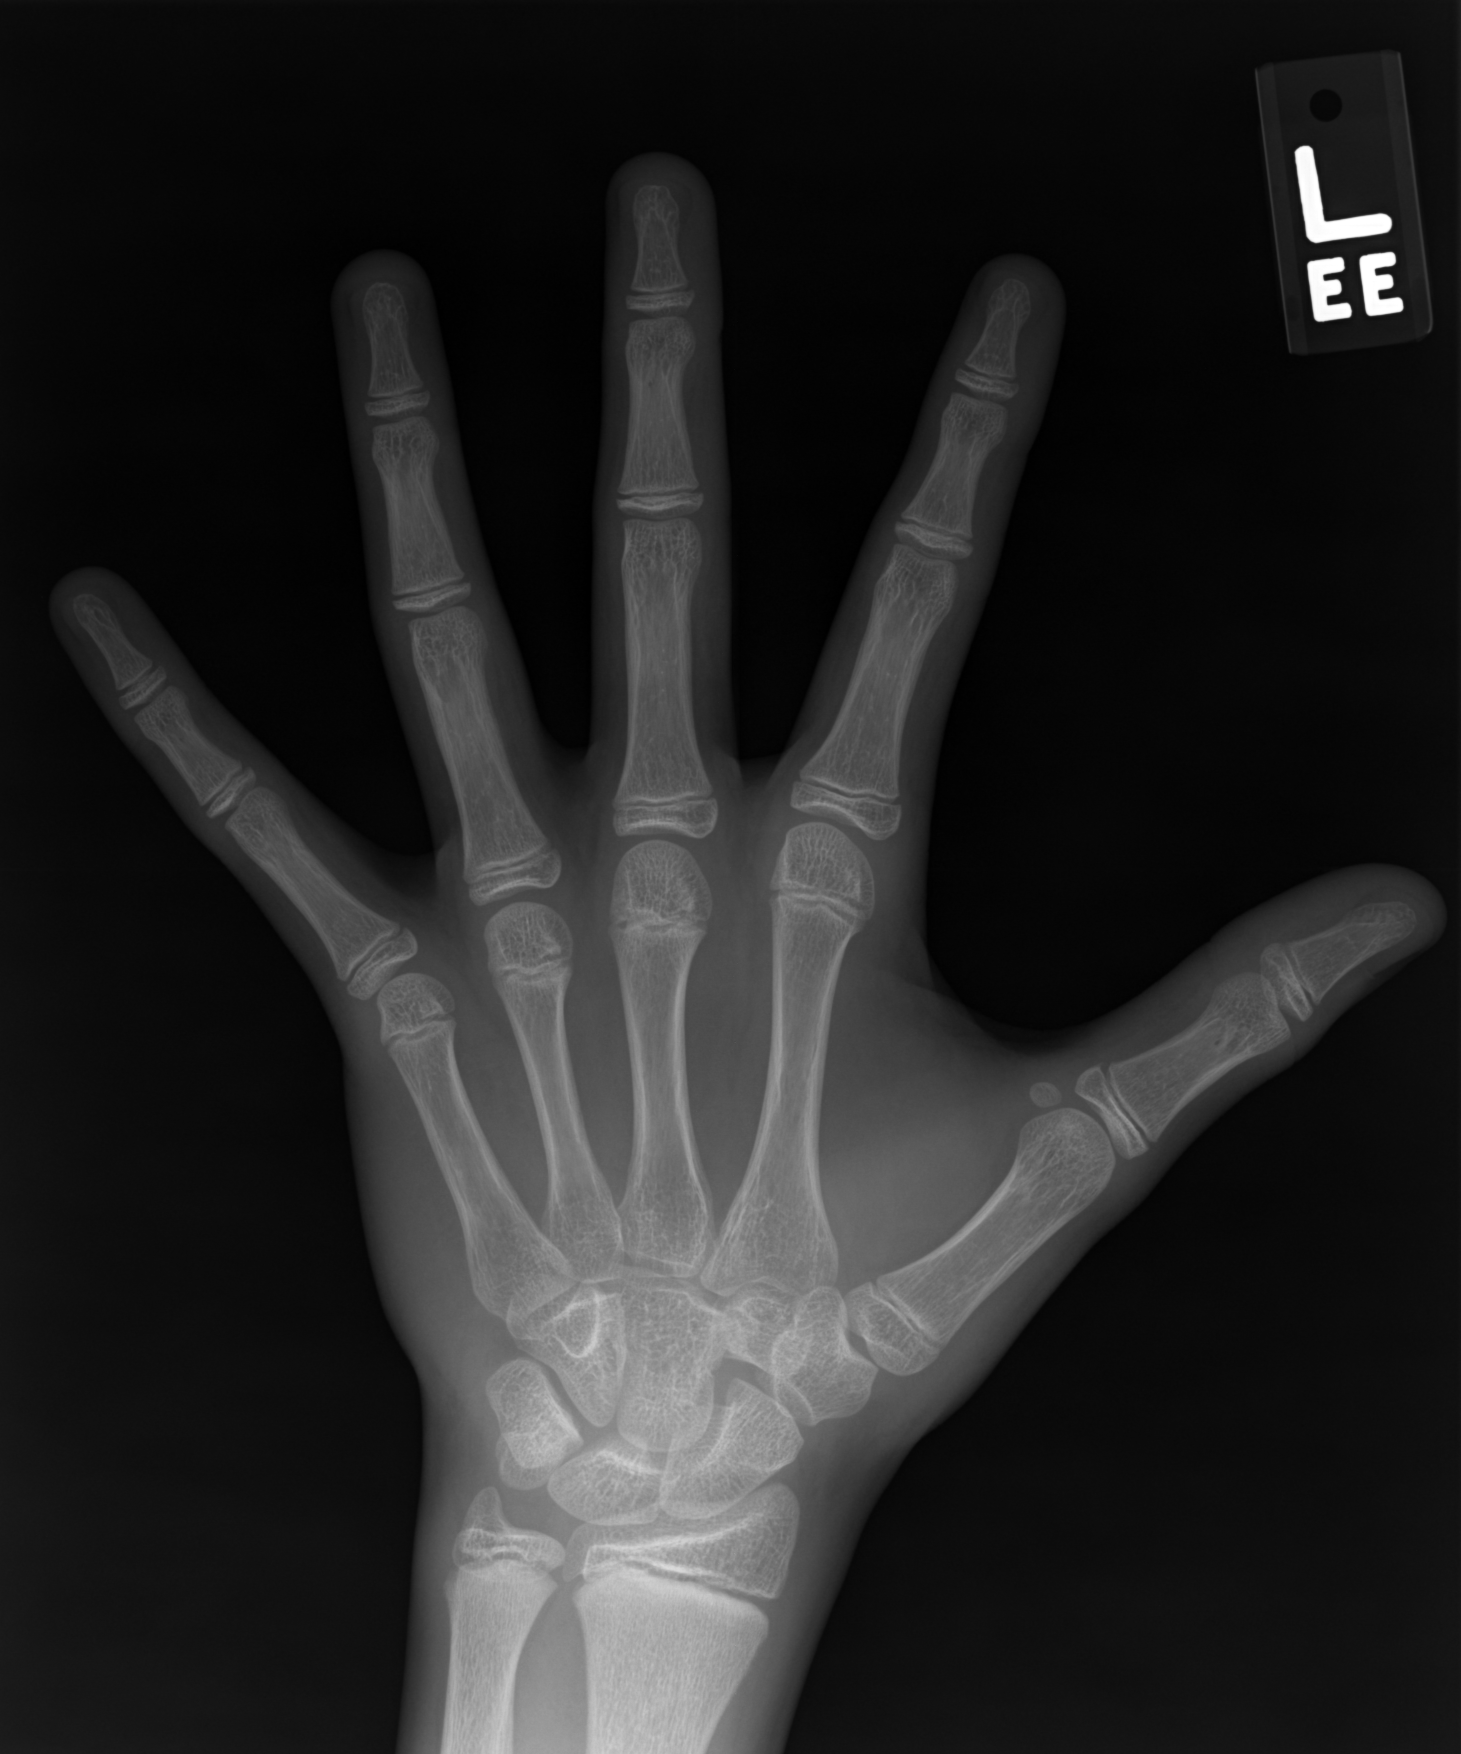

10046.png


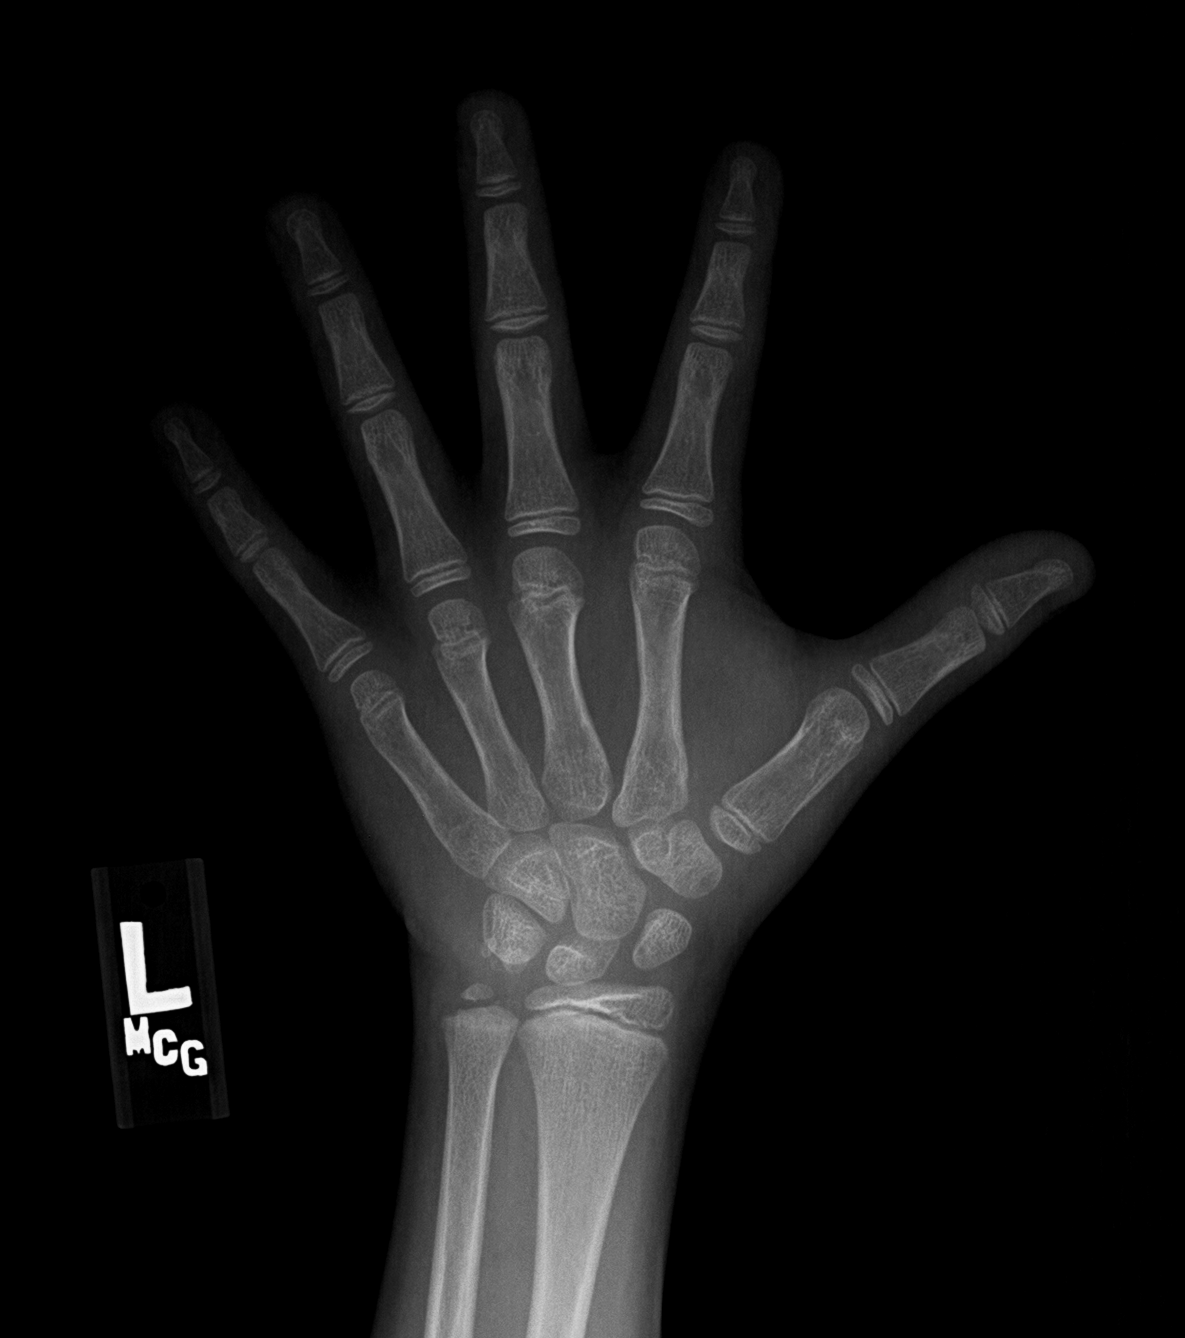

Files in train_files: 12611
Files in test_files: 200


In [62]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

print(os.listdir("C:/study/Artem/data-scince_A/open program/datasets/bone_age"))

folder = "C:/study/Artem/data-scince_A/open program/datasets/bone_age/boneage-training-dataset"
folder_test = "C:/study/Artem/data-scince_A/open program/datasets/bone_age/boneage-test-dataset"
csv_df = pd.read_csv("C:/study/Artem/data-scince_A/open program/datasets/bone_age/boneage-training-dataset.csv")
csv_df_test = pd.read_csv("C:/study/Artem/data-scince_A/open program/datasets/bone_age/boneage-test-dataset.csv")

onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
onlyfiles_test = [f for f in os.listdir(folder_test) if os.path.isfile(os.path.join(folder_test, f))]

print("Working with {0} images".format(len(onlyfiles)))
print("Image examples: ")
for i in range(40, 42):
    print(onlyfiles[i])
    display(_Imgdis(filename=folder + "/" + onlyfiles[i], width=240, height=320))
    


In [ ]:
# dividing into train files and test files
train_files = []
test_files = []
i=0

for _file in onlyfiles:
    train_files.append(_file)
    
for _file in onlyfiles_test:
    test_files.append(_file)

print("Files in train_files: %d" % len(train_files))
print("Files in test_files: %d" % len(test_files))

In [65]:
#df_train
#df_test
img_df = pd.DataFrame(data = train_files,  # This converts Array to Dataframe, with Index and Column names
                  index=None,
                  columns = None)
img_df_test = pd.DataFrame(data = test_files,  # This converts Array to Dataframe, with Index and Column names
                  index=None,
                  columns = None)

df_train = pd.concat([img_df,csv_df],axis = 1)  # Join two Dataframes
df_test = pd.concat([img_df_test,csv_df_test],axis = 1)

img_df = []
img_df_test = []

df_train = df_train.rename(index=str, columns={0: "file"}) #Change name of Column from 0 to FIle
df_test = df_test.rename(index=str, columns={0: "file"})

df_y = df_train[['boneage']].copy()

df_train = df_train.drop(columns = ['boneage'],axis = 1)  # Dropped Y values from columns

In [66]:
image_width = 320
image_height = 240
ratio = 4

image_width = int(image_width / ratio)
image_height = int(image_height / ratio)

channels = 3
nb_classes = 1

dataset = np.ndarray(shape=(len(df_train), channels, image_height, image_width),dtype=np.float32)
dataset_test = np.ndarray(shape=(len(df_test), channels, image_height, image_width),dtype=np.float32)


i = 0
for _file in df_train['file']:
    img = load_img(folder + "/" + _file,grayscale=False,target_size=[60,80],interpolation='nearest')  # this is a PIL image 
    img.thumbnail((image_width, image_height))
    x = img_to_array(img)  
    x = x.reshape((3, 60, 80))
    #Normalize
    x = (x - 128.0) / 128.0
    dataset[i] = x
    i += 1
    if i % 250 == 0:
        print("%d images to array" % i)
print("All TRAIN images to array!")
j = 0
for _file in df_test['file']:
    img = load_img(folder_test + "/" + _file,grayscale=False,target_size=[60,80],interpolation='nearest')  # this is a PIL image
    img.thumbnail((image_width, image_height))
    # Convert to Numpy Array
    x = img_to_array(img)  
    x = x.reshape((3, 60, 80))
    #Normalize
    x = (x - 128.0) / 128.0
    dataset_test[j] = x
    j += 1
    if j % 250 == 0:
        print("%d images to array" % j)
print("All TEST images to array!")

df_train = []
df_test = []

#dataset_test.shape

# This will flatten the entire array of [3,120,160], and also reshape it with right dimention
img_flat = dataset.flatten().reshape((12611,3*60*80))
img_flat_test = dataset_test.flatten().reshape((200,3*60*80))

img_flat.shape

# This converts Array to Dataframe, with Index and Column names
img_f = pd.DataFrame(data = img_flat[0:,1:],
                  index=None,
                  columns = None)
img_f_test = pd.DataFrame(data = img_flat_test[0:,1:],
                  index=None,
                  columns = None)
img_f_test.shape



#Got my dataFrame

img_flat = []
img_flat_test = []


#One hot encoding 
img_f = pd.get_dummies(img_f)
img_f_test = pd.get_dummies(img_f_test)

#final_train, final_test = oneHot_train.align(oneHot_test,join='left',axis=1)

my_imputer = Imputer()
img_f = pd.DataFrame(my_imputer.fit_transform(img_f))
img_f_test = pd.DataFrame(my_imputer.transform(img_f_test))

train_X,test_X, train_y,test_y = train_test_split(img_f.as_matrix(),df_y.as_matrix(), test_size=0.25)

print("Completed")

250 images to array
500 images to array
750 images to array
1000 images to array
1250 images to array
1500 images to array
1750 images to array
2000 images to array
2250 images to array
2500 images to array
2750 images to array
3000 images to array
3250 images to array
3500 images to array
3750 images to array
4000 images to array
4250 images to array
4500 images to array
4750 images to array
5000 images to array
5250 images to array
5500 images to array
5750 images to array
6000 images to array
6250 images to array
6500 images to array
6750 images to array
7000 images to array
7250 images to array
7500 images to array
7750 images to array
8000 images to array
8250 images to array
8500 images to array
8750 images to array
9000 images to array
9250 images to array
9500 images to array
9750 images to array
10000 images to array
10250 images to array
10500 images to array
10750 images to array
11000 images to array
11250 images to array
11500 images to array
11750 images to array
12000 im

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Completed


In [74]:
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators = 500,learning_rate = 0.1,silence= False)
my_model.fit(train_X,train_y,early_stopping_rounds=5,eval_set = [(test_X,test_y)], verbose = True)
predictions = my_model.predict(test_X)
print("MAE : "+ str(mean_absolute_error(predictions,test_y)))
#test_y.describe()


[17:48:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:121.473
Will train until validation_0-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:110.827
[2]	validation_0-rmse:101.392
[3]	validation_0-rmse:93.0303
[4]	validation_0-rmse:85.6597
[5]	validation_0-rmse:79.189
[6]	validation_0-rmse:73.5208
[7]	validation_0-rmse:68.5949
[8]	validation_0-rmse:64.3304
[9]	validation_0-rmse:60.6556
[10]	validation_0-rmse:57.5066
[11]	validation_0-rmse:54.8239
[12]	validation_0-rmse:52.5498
[13]	validation_0-rmse:50.6326
[14]	validation_0-rmse:49.0229
[15]	validation_0-rmse:47.6818
[16]	validation_0-rmse:46.554
[17]	validation_0-rmse:45.6234
[18]	validation_0-rmse:44.8529
[19]	validation_0-rmse:44.2285
[20]	validation_0-rmse:43.7052
[21]	validation_0-rmse:43.2828
[22]	validation_0-rmse:42.9371
[23]	validation_0-rmse:42.6592
[24]	validation_0-rmse:42.4354
[25]	vali

In [75]:
pred_Y = my_model.predict(test_X)
test_Y_months = test_y

Text(0, 0.5, 'Predicted Age (Month) ')

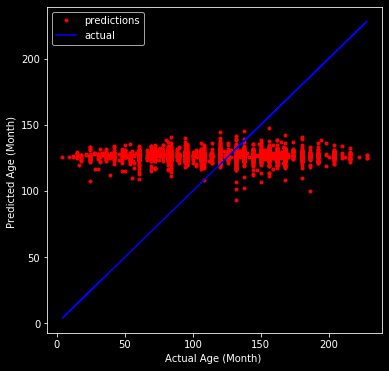

In [78]:
fig, ax1 = plt.subplots(1,1, figsize = (6,6))
ax1.plot(test_Y_months, pred_Y, 'r.', label = 'predictions')
ax1.plot(test_Y_months, test_Y_months, 'b-', label = 'actual')
ax1.legend()
ax1.set_xlabel('Actual Age (Month) ')
ax1.set_ylabel('Predicted Age (Month) ')